In [1]:
# required libraries
import numpy as np
import matplotlib.pyplot as plt
import std
import tfel.tests
from mtest import *
import os
import math 
import mtest
#help(mtest.MTest)

In [2]:
os.environ['LD_LIBRARY_PATH'] = "/home/eric/sources/mfront/HypoplasWrapper"
#!export LD_LIBRARY_PATH=${LD_LIBRARY_PATH}:/home/eric/sources/mfront/HypoplasWrapper
!export LD_LIBRARY_PATH="/home/eric/sources/mfront/HypoplasWrapper:$LD_LIBRARY_PATH"

In [3]:
os.environ['LD_LIBRARY_PATH'] = "$(pwd):$LD_LIBRARY_PATH"
!export LD_LIBRARY_PATH=$(pwd):$LD_LIBRARY_PATH

In [5]:
# python object
m = MTest()

# parameters
m.setBehaviour('generic', './src/libBehaviour.so', 'SmallStrainUmatWrapper')
m.setMaterialProperty('mps[0]', 22.0)
m.setMaterialProperty('mps[1]', 0.01)
m.setMaterialProperty('mps[2]', 0.128)
m.setMaterialProperty('mps[3]', 0.015)
m.setMaterialProperty('mps[4]', 1.51)
m.setMaterialProperty('mps[5]', 0.45)
m.setMaterialProperty('mps[6]', 1.0)
m.setMaterialProperty('mps[7]', 0.0)
m.setMaterialProperty('mps[8]', 0.0)
m.setMaterialProperty('mps[9]', 0.0)
m.setMaterialProperty('mps[10]', 5.0e-5)
m.setMaterialProperty('mps[11]', 0.08)
m.setMaterialProperty('mps[12]', 0.9)
m.setMaterialProperty('mps[13]', 0.0)
m.setMaterialProperty('mps[14]', 1.0)
m.setMaterialProperty('mps[15]', 0.5)
m.setMaterialProperty('mps[16]', 0.0)
m.setMaterialProperty('mps[17]', 3.0)
m.setMaterialProperty('mps[18]', 0.0)
m.setMaterialProperty('mps[19]', 0.0)
m.setMaterialProperty('mps[20]', 0.0)
m.setMaterialProperty('mps[21]', 0.761)

m.setExternalStateVariable('Temperature', 293.15)

#Initializing the stress state
m.setStress([-275.0, -275.0, -275.0, 0.0, 0.0, 0.0])
# test conditions
m.setImposedStrain('EXX', 0.0)
m.setImposedStrain('EYY', 0.0)
m.addEvolution('p', {0 : -275., 100 : -13000})
m.setNonLinearConstraint('SYY + SXX + SZZ - 3*p','Stress')
m.setTimes([i*0.1 for i in range(0,1000)])

# output file
output_file = 'SmallStrainUmatWrapper2.res'
m.setOutputFileName(output_file)

# execute MTest
m.execute()

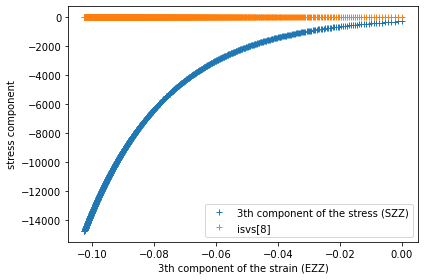

In [6]:
# load results
output_file = 'SmallStrainUmatWrapper2.res'
results = np.loadtxt(output_file).T

# read variables names
variables = []
file = open(output_file)
line = file.readline()
while line[0] == '#':
    variables.append(line.split(': ')[1].strip('\n'))
    line = file.readline()


    
# plot results
fig, ax = plt.subplots()
ax.set_xlabel(variables[3])
ax.set_ylabel('stress component')
#for i in [7,8,9,21]:
for i in [9,21]:
    plt.plot(results[3], results[i],
             label=variables[i],
             marker='+',
             linestyle='')

plt.legend()
plt.tight_layout()
plt.savefig('Umatwrapper_mtest.png',dpi=300)
plt.show()

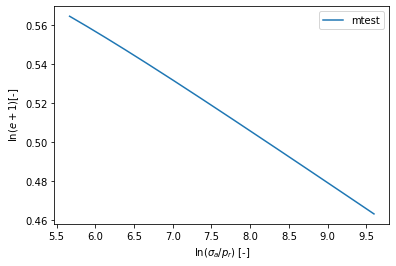

In [7]:
# load results
output_file = 'SmallStrainUmatWrapper2.res'
results = np.loadtxt(output_file,skiprows=32)

xdata_mtest = [np.log(-results[i][9]) for i in range(len(results))]   
ydata_mtest = [np.log(results[i][19]+1) for i in range(len(results))]

plt.plot(xdata_mtest, ydata_mtest, label='mtest')
plt.legend()
plt.xlabel('$\ln(\sigma_a/p_r$) [-]')
plt.ylabel(' $\ln(e+1)$[-]')
plt.savefig('mtest.png',dpi=300)
plt.show()

In [14]:
# triax test
brno_edo = ['''stage 0 init_pq -275 0.0 -0.00002
stage 55 triax_K0 p -13000

( **********model********** )

hypoplasti_clay_anisot 22 0.128 0.015 1.51 0.45 1.0
          0.761
''']

In [15]:
# create triax file
file_name = 'brno_edo.inp'
np.savetxt(file_name, brno_edo, fmt='%s')

In [16]:
# run triax 
!triax brno_edo.inp


Triax : single element program for soil mechanics
(c) David Masin 2001; masin@natur.cuni.cz

Calculation of input file brno_edo.inp


stage 0 init_pq : initial values of p, q, step_epax
	-275 0 -2e-05 

stage 55 triax_K0 : max & min values of condition
	condition: p -13000 

hypoplasti_clay_anisot : fi cr, lambda, kappa, N, nu, alpha, inic. his. var.: e0
	22 0.128 0.015 1.51 0.45 1 0.761 

Initializing the stress state
Calculation of stage 55

Calculation is finished. Results are in file brno_edo.out
Order of results :
	-ep ax, -sig ax', -sig rad', -ep v, -ep s, -p', -q, K, G, his. var.
Max f = -10, min f = -10



In [17]:
# processing triax results 
results = np.genfromtxt('brno-edo.out',delimiter=' ', dtype = float)
ep_ax = [row[0] for row in results]
sig_ax = [row[1] for row in results]
sig_rad = [row[2] for row in results]
ep_v = [row[3] for row in results]
ep_s = [row[4] for row in results]
p = [row[5] for row in results] # 
q = [row[6] for row in results]
K = [row[7] for row in results]
G = [row[8] for row in results]
e0 = [row[9] for row in results]

In [18]:
ydata_triax = [np.log(e0[i]+1) for i in range(len(e0))]
xdata_triax = [np.log(sig_ax[i]) for i in range(len(sig_ax))]

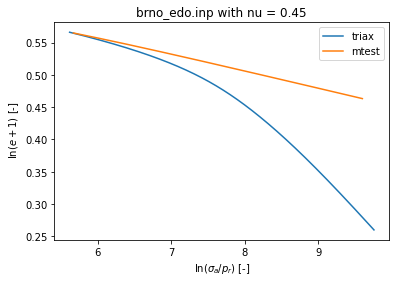

In [19]:
#plt.plot(ep_ax, sig_ax, label='triax')
plt.plot(xdata_triax, ydata_triax, label='triax')
plt.plot(xdata_mtest, ydata_mtest, label='mtest')
#plt.plot(time_exp, hydraulicflow_exp, label='experimental data')
plt.legend()
plt.title('brno_edo.inp with nu = 0.45')
plt.xlabel('$\ln(\sigma_a/p_r$) [-]')
plt.ylabel(' $\ln(e+1)$ [-]')
plt.savefig('brno_edo_triax_mtest_benchmark.png',dpi=300)
plt.show()